In [1]:
pip install kumaraswamy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
df = pd.read_csv("PDS2_1.csv")
df1 = df.cumsum(axis = 0) 

min_max_scaler = preprocessing.MinMaxScaler()
K_pdf = min_max_scaler.fit_transform(df)
K_cdf = min_max_scaler.fit_transform(df1.abs())

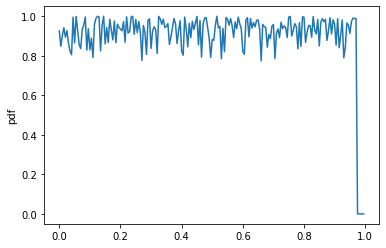

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(0,1,0.005), K_pdf)
plt.ylabel('pdf')
plt.show()

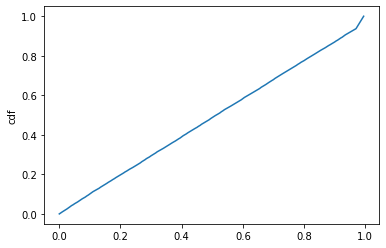

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.arange(0,1,0.005), K_cdf)
plt.ylabel('cdf')
plt.show()

## 1. Euclidean Distance

In [6]:
from kumaraswamy import kumaraswamy
from scipy.spatial import distance
dst = 100
for a in np.arange(0.1,100,0.1):
    for b in np.arange(0.1,100,0.1):
        if (distance.euclidean(K_pdf, kumaraswamy(a,b).rvs(200)) < dst):
            x = a
            y = b
            dst = distance.euclidean(K_pdf, kumaraswamy(a,b).rvs(200))
        else:
            continue
print (x,y,dst)

77.1 94.7 2.2042367699843814


In [21]:
from kumaraswamy import kumaraswamy
from scipy.spatial import distance
dst = 100
for a in np.arange(0.5,100,0.5):
    for b in np.arange(0.5,100,0.5):
        ar = []
        for i in np.arange(0,1,0.005):
            ar.append(kumaraswamy(a,b).cdf(i))
            
        if (distance.euclidean(K_cdf, ar) < dst):
            x = a
            y = b
            dst = distance.euclidean(K_cdf, ar)
        else:
            continue
print (x,y,dst)

1.0 1.0 0.23485126972429737


## 2. MSE Score

In [11]:
from sklearn.metrics import mean_squared_error
from kumaraswamy import kumaraswamy

mse = mean_squared_error(kumaraswamy(0.1,0.1).rvs(200), K_pdf)
for a in np.arange(0.1,100,0.1):
    for b in np.arange(0.1,100,0.1):
        if (mean_squared_error(kumaraswamy(a,b).rvs(200), K_pdf) < mse):
            x = a
            y = b
            mse = mean_squared_error(kumaraswamy(a,b).rvs(200), K_pdf)
        else:
            continue
print (x,y,mse)


59.1 98.0 0.022724329213437124


In [19]:
from sklearn.metrics import mean_squared_error
from kumaraswamy import kumaraswamy

mse = mean_squared_error(kumaraswamy(0.1,0.1).rvs(200), K_pdf)
for a in np.arange(0.5,100,0.5):
    for b in np.arange(0.5,100,0.5):
        ar = []
        for i in np.arange(0,1,0.005):
            ar.append(kumaraswamy(a,b).cdf(i))
        if (mean_squared_error(ar, K_cdf) < mse):
            x = a
            y = b
            mse = mean_squared_error(ar, K_cdf)
        else:
            continue
print (x,y,mse)


1.0 1.0 0.0002757755944555734


## 3. Regression

Text(0, 0.5, 'accuracy')

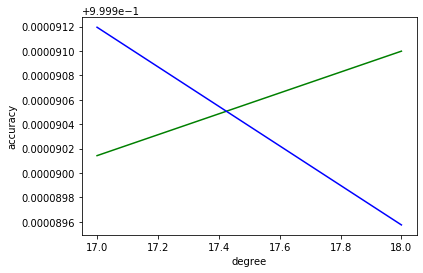

In [4]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

X = np.arange(0,1,0.005).reshape(-1, 1)
y = K_cdf.reshape(-1, 1)
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

train_score_list = []
test_score_list = []
#step 1: create model
for n in range(17,19):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
%matplotlib inline

x_axis = range(17,19)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')

## 4. Comparing mean and variance with for loop

In [28]:
from kumaraswamy import kumaraswamy
x = 0
y = 0
for a in np.arange(0.5,100,0.5):
    for b in np.arange(0.5,100,0.5):
        ar = []
        for i in np.arange(0,1,0.005):
            ar.append(kumaraswamy(a,b).cdf(i))
        if (round(np.mean(ar),2) == round(K_cdf.mean(),2)) and (round(np.var(ar),2) == round(K_cdf.var(),2)):
            x = a
            y = b
            break
print(x,y)      

0 0


In [ ]:
'''Scaling a distribution affects both mean and standard deviation but location shifting affects only mean

mean(z) = k1 * mean(x) + k2 ; where k1 and k2 are constants

standard_deviation(z) = k1 * standard_deviation(x)

Since we know mean(z), mean(x), standard_deviation(z) and standard_deviation(x) we can solve for k1 and k2

k1 = standard_deviation(z)/standard_deviation(x)

k2 = mean(z) - k1 * mean(x)''' 



In [27]:
# According to all models, lets consider the values of (a,b) be (1.0,1.0)

k1 = df.var()**0.5/kumaraswamy(1.0,1.0).var**0.5
k2 = df.mean() - (k1 * kumaraswamy(1.0,1.0).mean)

# Then, lower bound = (0 * k1) + k2 = k2
#       Upper bound = (1 * k1) + k2 = k1 + k2

print ("Lower Bound:", k2)
print ("Upper Bound:", k1 + k2)

Lower Bound: obs   -5.36755
dtype: float64
Upper Bound: obs   -2.025667
dtype: float64
